In [1]:
%matplotlib inline
from pylab import *
import numpy as np
from craco.search_pipeline import location2pix, get_grid_lut_from_plan, grid_candidates,wait_for_starts,waitall,print_candidates
from craco.search_pipeline import NBINARY_POINT_FDMTIN 
import craco
import craco.search_pipeline
from craco.pyxrtutil import *
import craft.craco_plan

from craft import uvfits

from craft.craco_plan import PipelinePlan
from craft.craco import printstats
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.info("test")
import time


INFO:root:test


In [2]:
fits='/data/craco/ban115/test_data/frb_d0_t0_a1_sninf_lm00/frb_d0_t0_a1_sninf_lm00.fits'
xclbin='/data/craco/ban115/builds/binary_container_1_10688715.xclbin'
#xclbin='/data/craco/ban115/builds/binary_container_01482863.xclbin'
alloc_device_only=True

In [3]:
values = craco.search_pipeline.get_parser().parse_args([])
print(values)

Namespace(boxcar_weight='sum', cand_file='candidates.txt', cell=None, device=0, dump_boxcar_hist_buf=None, dump_candidates=None, dump_fdmt_hist_buf=None, dump_mainbufs=None, dump_uvdata=None, fdmt_scale=1.0, fft_scale=10.0, fft_shift1=0, fft_shift2=7, input_scale=1.0, max_ndm=1024, nblocks=1, nbox=8, ncin=32, ndm=2, ndout=186, npix=256, nt=256, nuvmax=8192, nuvwide=8, os='2.1,2.1', run_fdmt=True, run_image=True, show=False, show_candidate_grid=None, threshold=10.0, uv='frb_d0_lm0_nt16_nant24.fits', verbose=False, wait=False, xclbin='binary_container_1.xclbin.golden')


In [4]:
device = pyxrt.device(1)
xbin = pyxrt.xclbin(xclbin)
uuid = device.load_xclbin(xbin)


In [5]:
f = uvfits.open(fits)
plan = PipelinePlan(f, "--ndm 512 --ndout 186")

INFO:root:Opening file /data/craco/ban115/test_data/frb_d0_t0_a1_sninf_lm00/frb_d0_t0_a1_sninf_lm00.fits
INFO:root:making Plan values=Namespace(boxcar_weight='sum', cell=None, fdmt_scale=1.0, fft_scale=10.0, max_ndm=1024, nbox=8, ncin=32, ndm=512, ndout=186, npix=256, nt=256, nuvmax=8192, nuvwide=8, os='2.1,2.1', pickle_fname='pipeline.pickle', save=False, show=False, show_fdmt=False, show_image=False, threshold=3, uv='uv_data', verbose=False)
INFO:root:Nbl=190 Fch1=735499993.944000 foff=1000000.047500 nchan=256 lambdamin=0.302877 uvmax=(2914.412072271962, 3548.709136210335) max baseline=(0.882709355209954, 1.0748235581559127) resolution=[70.77407077 58.12389754]arcsec uvcell=[33.70193846 27.67804645] arcsec uvcell= (23.90728653035594, 29.110504632975406) lambda FoV=[2.39658229 1.96821664] deg oversampled=(2.1, 2.1)
INFO:root:Got Ncells=3838 uvcells


parsing values --ndm 512 --ndout 186


INFO:root:FDMT plan has ntotal=5272 of 659 runs with packing efficiency 0.727997. Grid read requires efficiency of > 0.643555 of NUV=8192. History size square=753094656 minimal=163316296 =2 256MB HBM banks
INFO:root:FDMT zero cell is (658, 2)=5266
INFO:root:Saving uvgrid.split shape=(5245, 14) type=float64 to uv_data.uvgrid.split.txt header=ant1, ant2, u(pix), v(pix), chan1, chan2, irun, icell, total_overlap, max_idm, max_offset, offset_cff, idm_cff, fch1
INFO:root:Got 3388 unique UV coords. Upper=True
INFO:root:Need to write 212 groups of 16 register to pad function
INFO:root:Got 3367 unique UV coords. Upper=False
INFO:root:Need to write 211 groups of 16 register to pad function
INFO:root:Got 5362 upper grid instructions
INFO:root:Saving gridlut.upper shape=(5362, 5) type=int32 to uv_data.gridlut.upper.txt header=target_slot, uvidx, shift_flag, upix, vpix
INFO:root:Got 5324 lower grid instructions
INFO:root:Saving gridlut.lower shape=(5324, 5) type=int32 to uv_data.gridlut.lower.txt h

In [6]:
print(plan.ndout)

186


In [7]:
p = craco.search_pipeline.Pipeline(device, xbin, plan, alloc_device_only)

INFO:craco.search_pipeline:2636 2681 2662
INFO:craco.search_pipeline:(180214,)


Kernel krnl_ddgrid_reader_4cu:krnl_ddgrid_reader_4cu_1 has groups
GID=0=32
GID=1=-1
GID=2=-1
GID=3=-1
GID=4=-1
GID=5=15
Kernel krnl_grid_4cu:krnl_grid_4cu_1 has groups
GID=0=-1
GID=1=-1
GID=2=-1
GID=3=-1
GID=4=-1
GID=5=6
Kernel krnl_grid_4cu:krnl_grid_4cu_2 has groups
GID=0=-1
GID=1=-1
GID=2=-1
GID=3=-1
GID=4=-1
GID=5=7
Kernel krnl_grid_4cu:krnl_grid_4cu_3 has groups
GID=0=-1
GID=1=-1
GID=2=-1
GID=3=-1
GID=4=-1
GID=5=20
Kernel krnl_grid_4cu:krnl_grid_4cu_4 has groups
GID=0=-1
GID=1=-1
GID=2=-1
GID=3=-1
GID=4=-1
GID=5=21
Kernel fft2d:fft2d_1 has groups
Kernel fft2d:fft2d_2 has groups


INFO:craco.search_pipeline:lut.shape (180214,)
INFO:craco.search_pipeline:nuv 5272
INFO:craco.search_pipeline:Allocating grid LUTs
INFO:craco.search_pipeline:Allocating FDMT Input
INFO:craco.search_pipeline:5272
INFO:craco.search_pipeline:256
INFO:craco.search_pipeline:32
INFO:craco.search_pipeline:8
INFO:craco.search_pipeline:659
INFO:craco.search_pipeline:186
INFO:craco.search_pipeline:FDMT input buffer size 164.75 MB
INFO:craco.search_pipeline:Allocating FDMT history


Kernel fft2d:fft2d_3 has groups
Kernel fft2d:fft2d_4 has groups
Kernel krnl_boxc_4cu:krnl_boxc_4cu_1 has groups
GID=0=-1
GID=1=-1
GID=2=-1
GID=3=54
GID=4=54
GID=5=4
Kernel fdmt_tunable_c32:fdmt_tunable_c32_1 has groups
GID=0=52
GID=1=32
GID=2=53
GID=3=53
GID=4=14
Allocated 360428 bytes flags=flags.normal groupid=6 address=0x60000000
Allocated 360428 bytes flags=flags.normal groupid=7 address=0x70000000
Allocated 360428 bytes flags=flags.normal groupid=20 address=0x140000000
Allocated 360428 bytes flags=flags.normal groupid=21 address=0x150000000
Allocated 172752896 bytes flags=flags.normal groupid=52 address=0x90000000
Allocated 268435456 bytes flags=flags.normal groupid=53 address=0xa0000000


INFO:craco.search_pipeline:Allocating mainbuf
INFO:craco.search_pipeline:FDMT output buffer size 10.286819458007812 GB
INFO:root:Mainbuf shape is (659, 186, 11, 256, 8, 2) breaking into 8 buffers of [83, 186, 11, 256, 8, 2]


Allocated 653728 bytes flags=flags.normal groupid=14 address=0xe0000000
Allocated 1391149056 bytes flags=flags.normal groupid=32 address=0x4000000000
Allocated 1391149056 bytes flags=flags.normal groupid=32 address=0x4052eb4000
Allocated 1391149056 bytes flags=flags.normal groupid=32 address=0x40a5d68000
Allocated 1391149056 bytes flags=flags.normal groupid=32 address=0x40f8c1c000
Allocated 1391149056 bytes flags=flags.normal groupid=32 address=0x414bad0000
Allocated 1391149056 bytes flags=flags.normal groupid=32 address=0x419e984000
Allocated 1391149056 bytes flags=flags.normal groupid=32 address=0x41f1838000
Allocated 1391149056 bytes flags=flags.normal groupid=32 address=0x42446ec000


INFO:craco.search_pipeline:Allocating ddreader_lut
INFO:craco.search_pipeline:Allocating boxcar_history


Allocated 8192 bytes flags=flags.normal groupid=15 address=0xf0000000
Allocated 1073741824 bytes flags=flags.normal groupid=54 address=0x0


INFO:craco.search_pipeline:Allocating candidates


Boxcar history (1024, 8, 256, 256) 1073741824 2
Allocated 1048576 bytes flags=flags.normal groupid=4 address=0x40000000


In [99]:
p.clear_buffers(values)
# dmamp = 32 gives SNR=14.2
dmamp = 32
t0 = 0
dm = 0

# put in a value for a single time and DM
for b in p.all_mainbufs:
    print(b.shape)
    #b.nparr[:] = dmamp #np.random.randn(*b.nparr.shape)
    #b.nparr[:] = dmamp
    b.nparr[:,dm,0,t0,:,0] = dmamp
    b.copy_to_device() 

INFO:root:Clearing mainbuf data NBLK=11


[83, 186, 11, 256, 8, 2]
[83, 186, 11, 256, 8, 2]
[83, 186, 11, 256, 8, 2]
[83, 186, 11, 256, 8, 2]
[83, 186, 11, 256, 8, 2]
[83, 186, 11, 256, 8, 2]
[83, 186, 11, 256, 8, 2]
[83, 186, 11, 256, 8, 2]


In [100]:
mainbuf = p.copy_mainbuf()

(664, 186, 11, 256, 8, 2)
169984


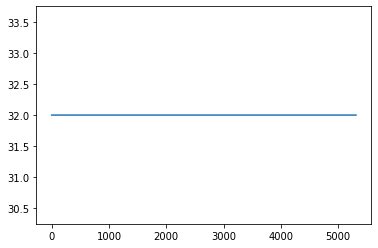

In [102]:
print(mainbuf.shape)
plot(mainbuf[:,0,0,t0,:,0].flat)
assert np.all(mainbuf[:,0,0,t0,:,0] == dmamp)
assert np.all(mainbuf[:,1:,1:,:t0,:,1] == 0)
assert np.all(mainbuf[:,1:,1:,:t0+1,:,1] == 0)
print(mainbuf.sum())

In [103]:
values.run_fdmt = False
values.run_image = True
values.threshold = 10
print(values)
p.run(0, values).wait()

INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running


Namespace(boxcar_weight='sum', cand_file='candidates.txt', cell=None, device=0, dump_boxcar_hist_buf=None, dump_candidates=None, dump_fdmt_hist_buf=None, dump_mainbufs=None, dump_uvdata=None, fdmt_scale=1.0, fft_scale=10.0, fft_shift1=0, fft_shift2=7, input_scale=0.0625, max_ndm=1024, nblocks=1, nbox=8, ncin=32, ndm=2, ndout=186, npix=256, nt=256, nuvmax=8192, nuvwide=8, os='2.1,2.1', run_fdmt=False, run_image=True, show=False, show_candidate_grid=None, threshold=10, uv='frb_d0_lm0_nt16_nant24.fits', verbose=False, wait=False, xclbin='binary_container_1.xclbin.golden')


INFO:craco.search_pipeline:Waiting for 10 starts


In [106]:
cands = p.get_candidates()
print(f'Got {len(cands)} candidates')
if len(cands) == 0: # are you sure?
    p.candidates.copy_from_device()
    print(p.candidates.nparr)
    
print_candidates(cands, 256, 0)

Got 21 candidates
# SNR	upix	vpix	boxc_width	time	dm	iblk

83.5	128	128	0		0	0	0
16.4	127	128	0		1	0	0
11.5	129	129	1		1	0	0
34.9	127	129	0		0	0	0
34.9	129	127	0		0	0	0
58.7	128	128	1		1	1	0
24.6	127	129	1		1	1	0
24.5	129	127	1		1	1	0
15.3	128	128	7		8	1	0
41.5	128	128	1		1	2	0
18.5	127	129	1		1	2	0
18.5	129	127	1		1	2	0
21.9	128	128	7		8	2	0
32.2	128	128	4		5	3	0
13.3	127	129	0		1	3	0
13.3	129	127	0		1	3	0
25.3	128	128	7		8	3	0
10.3	127	129	7		8	3	0
10.2	129	127	7		8	3	0
20.4	128	128	1		5	4	0
12.7	128	128	4		8	4	0


In [98]:
print(cands)
cands = cands[cands['dm'] == 0] # DM 0 adn 1 are repeated, I think.

[(5342,     0, 0,  15,   0) (1049,   256, 0,  14,   0)
 (2236,   511, 0,  15,   0) (2236, 65281, 0,  15,   0)
 ( 735, 65535, 1,  15,   0) (3756,     0, 1,  16,   0)
 (1572,   511, 1,  16,   0) (1572, 65281, 1,  16,   0)
 (2493,     0, 0,  15,   1) (1178,   511, 0,  15,   1)
 (1178, 65281, 0,  15,   1) (3756,     0, 1,  16,   1)
 (1573,   511, 1,  16,   1) (1573, 65281, 1,  16,   1)
 (1270,     0, 0,  15,   2) ( 647,   511, 0,  15,   2)
 ( 646, 65281, 0,  15,   2) (3004,     0, 2,  17,   2)
 (1263,   511, 2,  17,   2) (1254, 65281, 2,  17,   2)
 (2671,     0, 3,  18,   3) (1120,   511, 3,  18,   3)
 (1120, 65281, 3,  18,   3) ( 979,     0, 7,  24,   3)
 (2355,     0, 3,  19,   4) ( 982,   511, 4,  19,   4)
 ( 976, 65281, 4,  19,   4) (1182,     0, 7,  24,   4)
 (2169,     0, 5,  20,   5) ( 911,   511, 5,  20,   5)
 ( 910, 65281, 5,  20,   5) (1399,     0, 7,  24,   5)
 (2018,     0, 5,  20,   6) ( 859,   511, 5,  20,   6)
 ( 853, 65281, 5,  20,   6) (1398,     0, 7,  24,   6)
 (1872,   

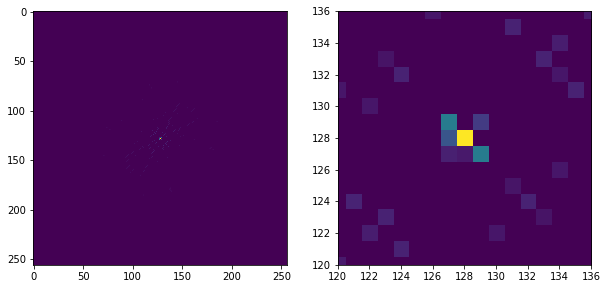

In [16]:
grid = grid_candidates(cands, 'snr')
fig, ax = subplots(1,2)
ax[0].imshow(grid)
ax[1].imshow(grid)
ax[1].set_xlim(128-8,128+8)
ax[1].set_ylim(128-8,128+8)
fig.set_size_inches([10,5])

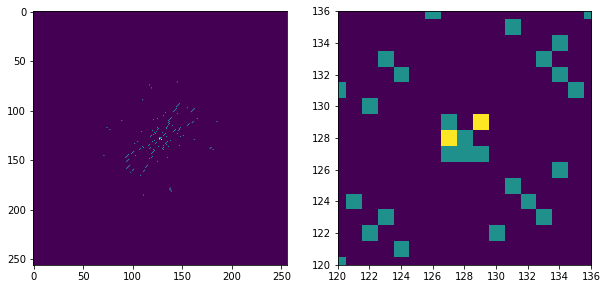

In [17]:
grid = grid_candidates(cands, 'count')
fig, ax = subplots(1,2)
ax[0].imshow(grid)
ax[1].imshow(grid)
ax[1].set_xlim(128-8,128+8)
ax[1].set_ylim(128-8,128+8)
fig.set_size_inches([10,5])

# Check DM0 for trange makes sense

In [174]:
location2pix(0)

(array(128), array(128))

In [227]:
all_cands = []
dm = 0
for t0 in range(16):
    p.clear_buffers(values)
    # dmamp = 32 gives SNR=14.2
    dmamp = 32
    print('t0', t0)

    # put in a value for a single time and DM
    for b in p.all_mainbufs:
        b.nparr[:] = 0
        b.nparr[:,dm,0,t0,:,0] = dmamp
        b.copy_to_device()

    values.run_fdmt = False
    values.run_image = True
    values.threshold = 5
    p.run(0, values).wait()
    cands = p.get_candidates().copy()
    all_cands.append(cands)
    c0 = cands[0]
    print(c0)
    #assert c0['upix'] == 128
    #assert c0['vpix'] == 128
    #assert c0['boxc_width'] == 0
    #assert c0['time'] == t0
    #assert c0['dm'] == 0
    print_candidates(cands, 256, 0)
    centrepix = cands[cands['loc_2dfft'] == 0] # 128, 128
    print_candidates(centrepix, 256,0)
    

    

INFO:root:Clearing mainbuf data NBLK=11


t0 0


INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=320 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:root:Clearing mainbuf data NBLK=11


(5342, 0, 0, 0, 0)
# SNR	upix	vpix	boxc_width	time	dm	iblk

83.5	128	128	0		0	0	0
16.4	127	128	0		1	0	0
11.5	129	129	1		1	0	0
34.9	127	129	0		0	0	0
5.6	138	130	0		0	0	0
5.2	122	130	0		0	0	0
8.0	135	131	0		1	0	0
5.2	134	132	1		1	0	0
7.9	124	132	0		0	0	0
8.0	133	133	0		0	0	0
6.8	134	134	0		0	0	0
5.2	117	134	0		1	0	0
8.0	131	135	0		1	0	0
5.6	116	135	0		1	0	0
6.5	136	136	1		1	0	0
5.2	126	136	1		1	0	0
5.6	130	138	0		0	0	0
6.1	121	141	1		1	0	0
6.6	120	142	1		1	0	0
5.6	135	116	0		1	0	0
5.3	134	117	0		1	0	0
5.6	126	118	0		0	0	0
6.7	142	120	1		1	0	0
6.0	120	120	0		0	0	0
6.2	141	121	1		1	0	0
8.0	124	121	0		1	0	0
5.1	130	122	0		0	0	0
6.8	122	122	0		0	0	0
8.0	123	123	0		0	0	0
7.9	132	124	0		0	0	0
8.2	121	124	0		1	0	0
5.2	134	126	0		0	0	0
5.6	118	126	0		0	0	0
34.9	129	127	0		0	0	0
7.2	127	127	0		0	0	0
5.6	127	128	7		8	0	0
5.6	128	127	7		8	0	0
58.7	128	128	1		1	1	0
7.4	129	129	0		1	1	0
24.6	127	129	1		1	1	0
7.4	137	131	0		1	1	0
6.1	136	132	1		1	1	0
5.5	124	132	1		1	1	0
6.1	133	133	0		1	1	0
6.3	134	1

INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=320 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:root:Clearing mainbuf data NBLK=11


(5342, 0, 0, 1, 0)
# SNR	upix	vpix	boxc_width	time	dm	iblk

83.5	128	128	0		1	0	0
5.3	125	128	1		1	0	0
16.4	128	129	0		0	0	0
34.9	127	129	0		1	0	0
5.6	138	130	0		1	0	0
5.2	122	130	0		1	0	0
8.2	135	132	0		0	0	0
7.9	124	132	0		1	0	0
8.0	133	133	0		1	0	0
6.8	134	134	0		1	0	0
5.1	126	134	0		1	0	0
8.0	132	135	0		0	0	0
6.2	115	135	1		1	0	0
6.0	136	136	0		1	0	0
6.7	114	136	1		1	0	0
5.6	130	138	0		1	0	0
5.3	122	139	0		0	0	0
5.6	121	140	0		0	0	0
6.6	136	114	1		1	0	0
6.1	135	115	1		1	0	0
5.6	126	118	0		1	0	0
5.2	130	120	1		1	0	0
6.5	120	120	1		1	0	0
5.6	140	121	0		0	0	0
7.9	125	121	0		0	0	0
5.3	139	122	0		0	0	0
6.8	122	122	0		1	0	0
8.0	123	123	0		1	0	0
7.9	132	124	0		1	0	0
5.2	122	124	1		1	0	0
5.1	128	125	1		1	0	0
8.0	121	125	0		0	0	0
5.2	134	126	0		1	0	0
5.6	118	126	0		1	0	0
34.9	129	127	0		1	0	0
11.5	127	127	1		1	0	0
28.7	128	128	7		8	0	0
12.0	127	129	7		8	0	0
12.0	129	127	7		8	0	0
58.7	128	128	1		2	1	0
8.8	127	128	0		3	1	0
7.7	128	129	0		0	1	0
24.6	127	129	1		2	1	0
6.7	135	131	0		3	1	0
5.1	13

INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=320 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:root:Clearing mainbuf data NBLK=11


(5342, 0, 0, 2, 0)
# SNR	upix	vpix	boxc_width	time	dm	iblk

83.5	128	128	0		2	0	0
16.4	127	128	0		3	0	0
11.5	129	129	1		3	0	0
34.9	127	129	0		2	0	0
5.6	138	130	0		2	0	0
5.2	122	130	0		2	0	0
8.0	135	131	0		3	0	0
5.2	134	132	1		3	0	0
7.9	124	132	0		2	0	0
8.0	133	133	0		2	0	0
6.8	134	134	0		2	0	0
5.2	117	134	0		3	0	0
8.0	131	135	0		3	0	0
5.6	116	135	0		3	0	0
6.5	136	136	1		3	0	0
5.2	126	136	1		3	0	0
5.6	130	138	0		2	0	0
6.1	121	141	1		3	0	0
6.6	120	142	1		3	0	0
5.6	135	116	0		3	0	0
5.3	134	117	0		3	0	0
5.6	126	118	0		2	0	0
6.7	142	120	1		3	0	0
6.0	120	120	0		2	0	0
6.2	141	121	1		3	0	0
8.0	124	121	0		3	0	0
5.1	130	122	0		2	0	0
6.8	122	122	0		2	0	0
8.0	123	123	0		2	0	0
7.9	132	124	0		2	0	0
8.2	121	124	0		3	0	0
5.2	134	126	0		2	0	0
5.6	118	126	0		2	0	0
34.9	129	127	0		2	0	0
7.2	127	127	0		2	0	0
31.3	128	128	6		8	0	0
6.7	127	128	5		8	0	0
6.1	129	129	6		8	0	0
13.1	127	129	6		8	0	0
13.1	129	127	6		8	0	0
58.7	128	128	1		3	1	0
7.4	129	129	0		3	1	0
24.6	127	129	1		3	1	0
7.4	137	131	0		3	1	0
6.1	13

INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=320 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:root:Clearing mainbuf data NBLK=11


(5342, 0, 0, 3, 0)
# SNR	upix	vpix	boxc_width	time	dm	iblk

83.5	128	128	0		3	0	0
5.3	125	128	1		3	0	0
16.4	128	129	0		2	0	0
34.9	127	129	0		3	0	0
5.6	138	130	0		3	0	0
5.2	122	130	0		3	0	0
8.2	135	132	0		2	0	0
7.9	124	132	0		3	0	0
8.0	133	133	0		3	0	0
6.8	134	134	0		3	0	0
5.1	126	134	0		3	0	0
8.0	132	135	0		2	0	0
6.2	115	135	1		3	0	0
6.0	136	136	0		3	0	0
6.7	114	136	1		3	0	0
5.6	130	138	0		3	0	0
5.3	122	139	0		2	0	0
5.6	121	140	0		2	0	0
6.6	136	114	1		3	0	0
6.1	135	115	1		3	0	0
5.6	126	118	0		3	0	0
5.2	130	120	1		3	0	0
6.5	120	120	1		3	0	0
5.6	140	121	0		2	0	0
7.9	125	121	0		2	0	0
5.3	139	122	0		2	0	0
6.8	122	122	0		3	0	0
8.0	123	123	0		3	0	0
7.9	132	124	0		3	0	0
5.2	122	124	1		3	0	0
5.1	128	125	1		3	0	0
8.0	121	125	0		2	0	0
5.2	134	126	0		3	0	0
5.6	118	126	0		3	0	0
34.9	129	127	0		3	0	0
11.5	127	127	1		3	0	0
33.9	128	128	5		8	0	0
14.2	127	129	5		8	0	0
14.2	129	127	5		8	0	0
6.1	127	127	6		8	0	0
58.7	128	128	1		4	1	0
8.8	127	128	0		5	1	0
7.7	128	129	0		2	1	0
24.6	127	129	1		4	1	0
6.7	13

INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=320 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:root:Clearing mainbuf data NBLK=11


(5342, 0, 0, 4, 0)
# SNR	upix	vpix	boxc_width	time	dm	iblk

83.5	128	128	0		4	0	0
16.4	127	128	0		5	0	0
11.5	129	129	1		5	0	0
34.9	127	129	0		4	0	0
5.6	138	130	0		4	0	0
5.2	122	130	0		4	0	0
8.0	135	131	0		5	0	0
5.2	134	132	1		5	0	0
7.9	124	132	0		4	0	0
8.0	133	133	0		4	0	0
6.8	134	134	0		4	0	0
5.2	117	134	0		5	0	0
8.0	131	135	0		5	0	0
5.6	116	135	0		5	0	0
6.5	136	136	1		5	0	0
5.2	126	136	1		5	0	0
5.6	130	138	0		4	0	0
6.1	121	141	1		5	0	0
6.6	120	142	1		5	0	0
5.6	135	116	0		5	0	0
5.3	134	117	0		5	0	0
5.6	126	118	0		4	0	0
6.7	142	120	1		5	0	0
6.0	120	120	0		4	0	0
6.2	141	121	1		5	0	0
8.0	124	121	0		5	0	0
5.1	130	122	0		4	0	0
6.8	122	122	0		4	0	0
8.0	123	123	0		4	0	0
7.9	132	124	0		4	0	0
8.2	121	124	0		5	0	0
5.2	134	126	0		4	0	0
5.6	118	126	0		4	0	0
34.9	129	127	0		4	0	0
7.2	127	127	0		4	0	0
36.5	128	128	4		8	0	0
8.2	127	128	3		8	0	0
7.1	129	129	4		8	0	0
15.2	127	129	4		8	0	0
15.3	129	127	4		8	0	0
58.7	128	128	1		5	1	0
7.4	129	129	0		5	1	0
24.6	127	129	1		5	1	0
7.4	137	131	0		5	1	0
6.1	13

INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=320 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:root:Clearing mainbuf data NBLK=11


(5342, 0, 0, 5, 0)
# SNR	upix	vpix	boxc_width	time	dm	iblk

83.5	128	128	0		5	0	0
5.3	125	128	1		5	0	0
16.4	128	129	0		4	0	0
34.9	127	129	0		5	0	0
5.6	138	130	0		5	0	0
5.2	122	130	0		5	0	0
8.2	135	132	0		4	0	0
7.9	124	132	0		5	0	0
8.0	133	133	0		5	0	0
6.8	134	134	0		5	0	0
5.1	126	134	0		5	0	0
8.0	132	135	0		4	0	0
6.2	115	135	1		5	0	0
6.0	136	136	0		5	0	0
6.7	114	136	1		5	0	0
5.6	130	138	0		5	0	0
5.3	122	139	0		4	0	0
5.6	121	140	0		4	0	0
6.6	136	114	1		5	0	0
6.1	135	115	1		5	0	0
5.6	126	118	0		5	0	0
5.2	130	120	1		5	0	0
6.5	120	120	1		5	0	0
5.6	140	121	0		4	0	0
7.9	125	121	0		4	0	0
5.3	139	122	0		4	0	0
6.8	122	122	0		5	0	0
8.0	123	123	0		5	0	0
7.9	132	124	0		5	0	0
5.2	122	124	1		5	0	0
5.1	128	125	1		5	0	0
8.0	121	125	0		4	0	0
5.2	134	126	0		5	0	0
5.6	118	126	0		5	0	0
34.9	129	127	0		5	0	0
11.5	127	127	1		5	0	0
41.7	128	128	3		8	0	0
17.5	127	129	3		8	0	0
17.5	129	127	3		8	0	0
7.1	127	127	4		8	0	0
58.7	128	128	1		6	1	0
8.8	127	128	0		7	1	0
7.7	128	129	0		4	1	0
24.6	127	129	1		6	1	0
6.7	13

INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=320 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:root:Clearing mainbuf data NBLK=11


(5342, 0, 0, 6, 0)
# SNR	upix	vpix	boxc_width	time	dm	iblk

83.5	128	128	0		6	0	0
16.4	127	128	0		7	0	0
11.5	129	129	1		7	0	0
34.9	127	129	0		6	0	0
5.6	138	130	0		6	0	0
5.2	122	130	0		6	0	0
8.0	135	131	0		7	0	0
5.2	134	132	1		7	0	0
7.9	124	132	0		6	0	0
8.0	133	133	0		6	0	0
6.8	134	134	0		6	0	0
5.2	117	134	0		7	0	0
8.0	131	135	0		7	0	0
5.6	116	135	0		7	0	0
6.5	136	136	1		7	0	0
5.2	126	136	1		7	0	0
5.6	130	138	0		6	0	0
6.1	121	141	1		7	0	0
6.6	120	142	1		7	0	0
5.6	135	116	0		7	0	0
5.3	134	117	0		7	0	0
5.6	126	118	0		6	0	0
6.7	142	120	1		7	0	0
6.0	120	120	0		6	0	0
6.2	141	121	1		7	0	0
8.0	124	121	0		7	0	0
5.1	130	122	0		6	0	0
6.8	122	122	0		6	0	0
8.0	123	123	0		6	0	0
7.9	132	124	0		6	0	0
8.2	121	124	0		7	0	0
5.2	134	126	0		6	0	0
5.6	118	126	0		6	0	0
34.9	129	127	0		6	0	0
7.2	127	127	0		6	0	0
46.9	128	128	2		8	0	0
11.5	127	128	1		8	0	0
9.2	129	129	2		8	0	0
19.6	127	129	2		8	0	0
5.6	135	131	1		8	0	0
5.2	133	133	2		8	0	0
5.6	131	135	1		8	0	0
5.2	136	136	2		8	0	0
5.3	120	142	2		8	0	0
5.3	142	

INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=320 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:root:Clearing mainbuf data NBLK=11


(5342, 0, 0, 7, 0)
# SNR	upix	vpix	boxc_width	time	dm	iblk

83.5	128	128	0		7	0	0
5.3	125	128	1		7	0	0
16.4	128	129	0		6	0	0
34.9	127	129	0		7	0	0
5.6	138	130	0		7	0	0
5.2	122	130	0		7	0	0
8.2	135	132	0		6	0	0
7.9	124	132	0		7	0	0
8.0	133	133	0		7	0	0
6.8	134	134	0		7	0	0
5.1	126	134	0		7	0	0
8.0	132	135	0		6	0	0
6.2	115	135	1		7	0	0
6.0	136	136	0		7	0	0
6.7	114	136	1		7	0	0
5.6	130	138	0		7	0	0
5.3	122	139	0		6	0	0
5.6	121	140	0		6	0	0
6.6	136	114	1		7	0	0
6.1	135	115	1		7	0	0
5.6	126	118	0		7	0	0
5.2	130	120	1		7	0	0
6.5	120	120	1		7	0	0
5.6	140	121	0		6	0	0
7.9	125	121	0		6	0	0
5.3	139	122	0		6	0	0
6.8	122	122	0		7	0	0
8.0	123	123	0		7	0	0
7.9	132	124	0		7	0	0
5.2	122	124	1		7	0	0
5.1	128	125	1		7	0	0
8.0	121	125	0		6	0	0
5.2	134	126	0		7	0	0
5.6	118	126	0		7	0	0
34.9	129	127	0		7	0	0
11.5	127	127	1		7	0	0
58.7	128	128	1		8	0	0
5.0	129	129	1		8	0	0
24.6	127	129	1		8	0	0
5.6	124	132	1		8	0	0
5.6	133	133	1		8	0	0
5.0	135	135	1		8	0	0
5.3	114	136	2		8	0	0
5.3	136	114	2		8	0	0
5.2	120	1

INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=320 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:root:Clearing mainbuf data NBLK=11


(5342, 0, 0, 8, 0)
# SNR	upix	vpix	boxc_width	time	dm	iblk

83.5	128	128	0		8	0	0
16.4	127	128	0		9	0	0
11.5	129	129	1		9	0	0
34.9	127	129	0		8	0	0
5.6	138	130	0		8	0	0
5.2	122	130	0		8	0	0
8.0	135	131	0		9	0	0
5.2	134	132	1		9	0	0
7.9	124	132	0		8	0	0
8.0	133	133	0		8	0	0
6.8	134	134	0		8	0	0
5.2	117	134	0		9	0	0
8.0	131	135	0		9	0	0
5.6	116	135	0		9	0	0
6.5	136	136	1		9	0	0
5.2	126	136	1		9	0	0
5.6	130	138	0		8	0	0
6.1	121	141	1		9	0	0
6.6	120	142	1		9	0	0
5.6	135	116	0		9	0	0
5.3	134	117	0		9	0	0
5.6	126	118	0		8	0	0
6.7	142	120	1		9	0	0
6.0	120	120	0		8	0	0
6.2	141	121	1		9	0	0
8.0	124	121	0		9	0	0
5.1	130	122	0		8	0	0
6.8	122	122	0		8	0	0
8.0	123	123	0		8	0	0
7.9	132	124	0		8	0	0
8.2	121	124	0		9	0	0
5.2	134	126	0		8	0	0
5.6	118	126	0		8	0	0
34.9	129	127	0		8	0	0
7.2	127	127	0		8	0	0
5.6	127	128	7		16	0	0
5.6	128	127	7		16	0	0
58.7	128	128	1		9	1	0
7.4	129	129	0		9	1	0
24.6	127	129	1		9	1	0
7.4	137	131	0		9	1	0
6.1	136	132	1		9	1	0
5.5	124	132	1		9	1	0
6.1	133	133	0		9	1	0
6.3	134

INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=320 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:root:Clearing mainbuf data NBLK=11


(5342, 0, 0, 9, 0)
# SNR	upix	vpix	boxc_width	time	dm	iblk

83.5	128	128	0		9	0	0
5.3	125	128	1		9	0	0
16.4	128	129	0		8	0	0
34.9	127	129	0		9	0	0
5.6	138	130	0		9	0	0
5.2	122	130	0		9	0	0
8.2	135	132	0		8	0	0
7.9	124	132	0		9	0	0
8.0	133	133	0		9	0	0
6.8	134	134	0		9	0	0
5.1	126	134	0		9	0	0
8.0	132	135	0		8	0	0
6.2	115	135	1		9	0	0
6.0	136	136	0		9	0	0
6.7	114	136	1		9	0	0
5.6	130	138	0		9	0	0
5.3	122	139	0		8	0	0
5.6	121	140	0		8	0	0
6.6	136	114	1		9	0	0
6.1	135	115	1		9	0	0
5.6	126	118	0		9	0	0
5.2	130	120	1		9	0	0
6.5	120	120	1		9	0	0
5.6	140	121	0		8	0	0
7.9	125	121	0		8	0	0
5.3	139	122	0		8	0	0
6.8	122	122	0		9	0	0
8.0	123	123	0		9	0	0
7.9	132	124	0		9	0	0
5.2	122	124	1		9	0	0
5.1	128	125	1		9	0	0
8.0	121	125	0		8	0	0
5.2	134	126	0		9	0	0
5.6	118	126	0		9	0	0
34.9	129	127	0		9	0	0
11.5	127	127	1		9	0	0
28.7	128	128	7		16	0	0
12.0	127	129	7		16	0	0
12.0	129	127	7		16	0	0
58.7	128	128	1		10	1	0
8.8	127	128	0		11	1	0
7.7	128	129	0		8	1	0
24.6	127	129	1		10	1	0
6.7	135	131	0		11	1	0

INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=320 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:root:Clearing mainbuf data NBLK=11


(5342, 0, 0, 10, 0)
# SNR	upix	vpix	boxc_width	time	dm	iblk

83.5	128	128	0		10	0	0
16.4	127	128	0		11	0	0
11.5	129	129	1		11	0	0
34.9	127	129	0		10	0	0
5.6	138	130	0		10	0	0
5.2	122	130	0		10	0	0
8.0	135	131	0		11	0	0
5.2	134	132	1		11	0	0
7.9	124	132	0		10	0	0
8.0	133	133	0		10	0	0
6.8	134	134	0		10	0	0
5.2	117	134	0		11	0	0
8.0	131	135	0		11	0	0
5.6	116	135	0		11	0	0
6.5	136	136	1		11	0	0
5.2	126	136	1		11	0	0
5.6	130	138	0		10	0	0
6.1	121	141	1		11	0	0
6.6	120	142	1		11	0	0
5.6	135	116	0		11	0	0
5.3	134	117	0		11	0	0
5.6	126	118	0		10	0	0
6.7	142	120	1		11	0	0
6.0	120	120	0		10	0	0
6.2	141	121	1		11	0	0
8.0	124	121	0		11	0	0
5.1	130	122	0		10	0	0
6.8	122	122	0		10	0	0
8.0	123	123	0		10	0	0
7.9	132	124	0		10	0	0
8.2	121	124	0		11	0	0
5.2	134	126	0		10	0	0
5.6	118	126	0		10	0	0
34.9	129	127	0		10	0	0
7.2	127	127	0		10	0	0
31.3	128	128	6		16	0	0
6.7	127	128	5		16	0	0
6.1	129	129	6		16	0	0
13.1	127	129	6		16	0	0
13.1	129	127	6		16	0	0
58.7	128	128	1		11	1	0
7.4	129	129	0		11	1	0
24.6	1

INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=320 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:root:Clearing mainbuf data NBLK=11


(5342, 0, 0, 11, 0)
# SNR	upix	vpix	boxc_width	time	dm	iblk

83.5	128	128	0		11	0	0
5.3	125	128	1		11	0	0
16.4	128	129	0		10	0	0
34.9	127	129	0		11	0	0
5.6	138	130	0		11	0	0
5.2	122	130	0		11	0	0
8.2	135	132	0		10	0	0
7.9	124	132	0		11	0	0
8.0	133	133	0		11	0	0
6.8	134	134	0		11	0	0
5.1	126	134	0		11	0	0
8.0	132	135	0		10	0	0
6.2	115	135	1		11	0	0
6.0	136	136	0		11	0	0
6.7	114	136	1		11	0	0
5.6	130	138	0		11	0	0
5.3	122	139	0		10	0	0
5.6	121	140	0		10	0	0
6.6	136	114	1		11	0	0
6.1	135	115	1		11	0	0
5.6	126	118	0		11	0	0
5.2	130	120	1		11	0	0
6.5	120	120	1		11	0	0
5.6	140	121	0		10	0	0
7.9	125	121	0		10	0	0
5.3	139	122	0		10	0	0
6.8	122	122	0		11	0	0
8.0	123	123	0		11	0	0
7.9	132	124	0		11	0	0
5.2	122	124	1		11	0	0
5.1	128	125	1		11	0	0
8.0	121	125	0		10	0	0
5.2	134	126	0		11	0	0
5.6	118	126	0		11	0	0
34.9	129	127	0		11	0	0
11.5	127	127	1		11	0	0
33.9	128	128	5		16	0	0
14.2	127	129	5		16	0	0
14.2	129	127	5		16	0	0
6.1	127	127	6		16	0	0
58.7	128	128	1		12	1	0
8.8	127	128	0		13	1	0
7.7	12

INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=320 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:root:Clearing mainbuf data NBLK=11


(5342, 0, 0, 12, 0)
# SNR	upix	vpix	boxc_width	time	dm	iblk

83.5	128	128	0		12	0	0
16.4	127	128	0		13	0	0
11.5	129	129	1		13	0	0
34.9	127	129	0		12	0	0
5.6	138	130	0		12	0	0
5.2	122	130	0		12	0	0
8.0	135	131	0		13	0	0
5.2	134	132	1		13	0	0
7.9	124	132	0		12	0	0
8.0	133	133	0		12	0	0
6.8	134	134	0		12	0	0
5.2	117	134	0		13	0	0
8.0	131	135	0		13	0	0
5.6	116	135	0		13	0	0
6.5	136	136	1		13	0	0
5.2	126	136	1		13	0	0
5.6	130	138	0		12	0	0
6.1	121	141	1		13	0	0
6.6	120	142	1		13	0	0
5.6	135	116	0		13	0	0
5.3	134	117	0		13	0	0
5.6	126	118	0		12	0	0
6.7	142	120	1		13	0	0
6.0	120	120	0		12	0	0
6.2	141	121	1		13	0	0
8.0	124	121	0		13	0	0
5.1	130	122	0		12	0	0
6.8	122	122	0		12	0	0
8.0	123	123	0		12	0	0
7.9	132	124	0		12	0	0
8.2	121	124	0		13	0	0
5.2	134	126	0		12	0	0
5.6	118	126	0		12	0	0
34.9	129	127	0		12	0	0
7.2	127	127	0		12	0	0
36.5	128	128	4		16	0	0
8.2	127	128	3		16	0	0
7.1	129	129	4		16	0	0
15.2	127	129	4		16	0	0
15.3	129	127	4		16	0	0
58.7	128	128	1		13	1	0
7.4	129	129	0		13	1	0
24.6	1

INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=320 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:root:Clearing mainbuf data NBLK=11


(5342, 0, 0, 13, 0)
# SNR	upix	vpix	boxc_width	time	dm	iblk

83.5	128	128	0		13	0	0
5.3	125	128	1		13	0	0
16.4	128	129	0		12	0	0
34.9	127	129	0		13	0	0
5.6	138	130	0		13	0	0
5.2	122	130	0		13	0	0
8.2	135	132	0		12	0	0
7.9	124	132	0		13	0	0
8.0	133	133	0		13	0	0
6.8	134	134	0		13	0	0
5.1	126	134	0		13	0	0
8.0	132	135	0		12	0	0
6.2	115	135	1		13	0	0
6.0	136	136	0		13	0	0
6.7	114	136	1		13	0	0
5.6	130	138	0		13	0	0
5.3	122	139	0		12	0	0
5.6	121	140	0		12	0	0
6.6	136	114	1		13	0	0
6.1	135	115	1		13	0	0
5.6	126	118	0		13	0	0
5.2	130	120	1		13	0	0
6.5	120	120	1		13	0	0
5.6	140	121	0		12	0	0
7.9	125	121	0		12	0	0
5.3	139	122	0		12	0	0
6.8	122	122	0		13	0	0
8.0	123	123	0		13	0	0
7.9	132	124	0		13	0	0
5.2	122	124	1		13	0	0
5.1	128	125	1		13	0	0
8.0	121	125	0		12	0	0
5.2	134	126	0		13	0	0
5.6	118	126	0		13	0	0
34.9	129	127	0		13	0	0
11.5	127	127	1		13	0	0
41.7	128	128	3		16	0	0
17.5	127	129	3		16	0	0
17.5	129	127	3		16	0	0
7.1	127	127	4		16	0	0
58.7	128	128	1		14	1	0
8.8	127	128	0		15	1	0
7.7	12

INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=320 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts
INFO:root:Clearing mainbuf data NBLK=11


(5342, 0, 0, 14, 0)
# SNR	upix	vpix	boxc_width	time	dm	iblk

83.5	128	128	0		14	0	0
16.4	127	128	0		15	0	0
11.5	129	129	1		15	0	0
34.9	127	129	0		14	0	0
5.6	138	130	0		14	0	0
5.2	122	130	0		14	0	0
8.0	135	131	0		15	0	0
5.2	134	132	1		15	0	0
7.9	124	132	0		14	0	0
8.0	133	133	0		14	0	0
6.8	134	134	0		14	0	0
5.2	117	134	0		15	0	0
8.0	131	135	0		15	0	0
5.6	116	135	0		15	0	0
6.5	136	136	1		15	0	0
5.2	126	136	1		15	0	0
5.6	130	138	0		14	0	0
6.1	121	141	1		15	0	0
6.6	120	142	1		15	0	0
5.6	135	116	0		15	0	0
5.3	134	117	0		15	0	0
5.6	126	118	0		14	0	0
6.7	142	120	1		15	0	0
6.0	120	120	0		14	0	0
6.2	141	121	1		15	0	0
8.0	124	121	0		15	0	0
5.1	130	122	0		14	0	0
6.8	122	122	0		14	0	0
8.0	123	123	0		14	0	0
7.9	132	124	0		14	0	0
8.2	121	124	0		15	0	0
5.2	134	126	0		14	0	0
5.6	118	126	0		14	0	0
34.9	129	127	0		14	0	0
7.2	127	127	0		14	0	0
46.9	128	128	2		16	0	0
11.5	127	128	1		16	0	0
9.2	129	129	2		16	0	0
19.6	127	129	2		16	0	0
5.6	135	131	1		16	0	0
5.2	133	133	2		16	0	0
5.6	131	135	1		16	0	0
5.2	136

INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=320 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts


(5342, 0, 0, 15, 0)
# SNR	upix	vpix	boxc_width	time	dm	iblk

83.5	128	128	0		15	0	0
5.3	125	128	1		15	0	0
16.4	128	129	0		14	0	0
34.9	127	129	0		15	0	0
5.6	138	130	0		15	0	0
5.2	122	130	0		15	0	0
8.2	135	132	0		14	0	0
7.9	124	132	0		15	0	0
8.0	133	133	0		15	0	0
6.8	134	134	0		15	0	0
5.1	126	134	0		15	0	0
8.0	132	135	0		14	0	0
6.2	115	135	1		15	0	0
6.0	136	136	0		15	0	0
6.7	114	136	1		15	0	0
5.6	130	138	0		15	0	0
5.3	122	139	0		14	0	0
5.6	121	140	0		14	0	0
6.6	136	114	1		15	0	0
6.1	135	115	1		15	0	0
5.6	126	118	0		15	0	0
5.2	130	120	1		15	0	0
6.5	120	120	1		15	0	0
5.6	140	121	0		14	0	0
7.9	125	121	0		14	0	0
5.3	139	122	0		14	0	0
6.8	122	122	0		15	0	0
8.0	123	123	0		15	0	0
7.9	132	124	0		15	0	0
5.2	122	124	1		15	0	0
5.1	128	125	1		15	0	0
8.0	121	125	0		14	0	0
5.2	134	126	0		15	0	0
5.6	118	126	0		15	0	0
34.9	129	127	0		15	0	0
11.5	127	127	1		15	0	0
58.7	128	128	1		16	0	0
5.0	129	129	1		16	0	0
24.6	127	129	1		16	0	0
5.6	124	132	1		16	0	0
5.6	133	133	1		16	0	0
5.0	135	135	1		16	0	0
5.3	114	

In [19]:
for c in all_cands:
    print_candidates(c, 256, 0)

# SNR	upix	vpix	boxc_width	time	dm	iblk

83.5	128	128	0		0	0	0
16.4	127	128	0		1	0	0
11.5	129	129	1		1	0	0
34.9	127	129	0		0	0	0
34.9	129	127	0		0	0	0
58.7	128	128	1		1	1	0
24.6	127	129	1		1	1	0
24.5	129	127	1		1	1	0
15.3	128	128	7		8	1	0
47.2	128	128	4		4	2	0
19.7	127	129	2		2	2	0
19.7	129	127	2		2	2	0
30.3	128	128	7		8	2	0
11.4	127	129	7		8	2	0
11.6	129	127	7		8	2	0
52.0	128	128	5		5	3	0
21.0	127	129	5		5	3	0
20.8	129	127	5		5	3	0
40.6	128	128	7		8	3	0
16.0	127	129	7		8	3	0
15.9	129	127	7		8	3	0
49.5	128	128	5		5	4	0
20.3	127	129	5		5	4	0
20.4	129	127	5		5	4	0
38.5	128	128	7		8	4	0
15.4	127	129	7		8	4	0
15.5	129	127	7		8	4	0
46.6	128	128	3		5	5	0
19.4	127	129	5		5	5	0
19.3	129	127	5		5	5	0
35.5	128	128	7		8	5	0
14.6	127	129	7		8	5	0
14.6	129	127	7		8	5	0
40.6	128	128	1		5	6	0
16.9	127	129	5		5	6	0
16.9	129	127	5		5	6	0
32.1	128	128	7		8	6	0
13.2	127	129	7		8	6	0
13.3	129	127	7		8	6	0
36.5	128	128	6		6	7	0
15.5	127	129	6		6	7	0
15.5	129	127	6		6	7	0
31.9	128	128	7		8	7	0
13.2	127	129	

# SNR	upix	vpix	boxc_width	time	dm	iblk

83.5	128	128	0		6	0	0
16.4	127	128	0		7	0	0
11.5	129	129	1		7	0	0
34.9	127	129	0		6	0	0
34.9	129	127	0		6	0	0
46.9	128	128	2		8	0	0
11.5	127	128	1		8	0	0
19.6	127	129	2		8	0	0
19.7	129	127	2		8	0	0
58.7	128	128	1		7	1	0
24.6	127	129	1		7	1	0
24.5	129	127	1		7	1	0
46.9	128	128	2		8	1	0
19.7	127	129	2		8	1	0
19.6	129	127	2		8	1	0
41.5	128	128	1		7	2	0
18.5	127	129	1		7	2	0
18.5	129	127	1		7	2	0
46.9	128	128	2		8	2	0
19.7	127	129	2		8	2	0
19.7	129	127	2		8	2	0
29.1	128	128	0		7	3	0
13.3	127	129	0		7	3	0
13.3	129	127	0		7	3	0
41.7	128	128	3		9	3	0
17.5	127	129	3		9	3	0
17.4	129	127	3		9	3	0
20.9	128	128	1		7	4	0
10.2	127	129	1		7	4	0
10.2	129	127	1		7	4	0
36.8	128	128	3		10	4	0
15.3	127	129	4		10	4	0
15.3	129	127	4		10	4	0
11.8	128	128	7		16	4	0
13.9	128	128	1		7	5	0
33.9	128	128	5		11	5	0
14.2	127	129	5		11	5	0
14.2	129	127	5		11	5	0
15.3	128	128	7		16	5	0
13.9	128	128	1		7	6	0
31.5	128	128	5		11	6	0
13.4	127	129	5		11	6	0
13.4	129	127	5		11	6	0
18

12.3	128	128	1		8	407	0
12.8	128	128	1		81	407	0
12.8	128	128	1		82	408	0
10.1	128	128	2		147	408	0
18.2	128	128	0		82	409	0
10.1	128	128	2		148	409	0
18.2	128	128	0		82	410	0
10.1	128	128	2		148	410	0
12.8	128	128	1		83	411	0
12.7	128	128	1		148	411	0
12.8	128	128	1		83	412	0
10.1	128	128	2		149	412	0
12.8	128	128	1		84	413	0
12.6	128	128	1		149	413	0
10.4	128	128	2		85	414	0
17.9	128	128	0		149	414	0
10.4	128	128	2		85	415	0
12.6	128	128	1		150	415	0
12.3	128	128	1		7	416	0
17.9	128	128	0		150	416	0
10.1	128	128	2		152	416	0
17.5	128	128	0		7	417	0
12.3	128	128	1		8	417	0
12.6	128	128	1		151	417	0
10.1	128	128	2		152	417	0
17.5	128	128	0		7	418	0
12.3	128	128	1		8	418	0
17.9	128	128	0		151	418	0
12.6	128	128	1		152	418	0
# SNR	upix	vpix	boxc_width	time	dm	iblk

83.5	128	128	0		8	0	0
16.4	127	128	0		9	0	0
11.5	129	129	1		9	0	0
34.9	127	129	0		8	0	0
34.9	129	127	0		8	0	0
58.7	128	128	1		9	1	0
24.6	127	129	1		9	1	0
24.5	129	127	1		9	1	0
15.3	128	128	7		16	1	0
46.9	128	128	2		10	2	0
19.7

12.1	128	128	1		159	305	0
10.2	128	128	2		199	305	0
12.2	128	128	1		232	305	0
17.2	128	128	0		159	306	0
12.3	128	128	1		160	306	0
12.5	128	128	1		199	306	0
10.2	128	128	2		200	306	0
12.3	128	128	1		232	306	0
18.0	128	128	0		72	338	0
10.1	128	128	2		128	338	0
12.6	128	128	1		217	338	0
18.0	128	128	0		72	339	0
10.1	128	128	2		128	339	0
12.4	128	128	1		176	339	0
10.1	128	128	2		218	339	0
12.3	128	128	1		10	340	0
12.6	128	128	1		73	340	0
10.1	128	128	2		129	340	0
12.6	128	128	1		218	340	0
17.2	128	128	0		10	341	0
10.2	128	128	2		74	341	0
12.6	128	128	1		219	341	0
17.2	128	128	0		10	342	0
12.8	128	128	1		74	342	0
10.1	128	128	2		220	342	0
12.1	128	128	1		11	343	0
10.2	128	128	2		75	343	0
12.6	128	128	1		220	343	0
12.6	128	128	1		221	344	0
17.7	128	128	0		221	345	0
12.6	128	128	1		222	346	0
12.6	128	128	1		223	347	0
10.2	128	128	2		224	347	0
17.7	128	128	0		223	348	0
12.4	128	128	1		224	348	0
12.4	128	128	1		10	403	0
17.5	128	128	0		10	404	0
10.3	128	128	2		84	404	0
17.5	128	128	0		10	405	0


13.9	128	128	0		162	504	0
13.9	128	128	0		170	504	0
13.9	128	128	0		178	504	0
22.9	128	128	0		186	504	0
13.9	128	128	0		194	504	0
13.9	128	128	0		202	504	0
13.9	128	128	0		210	504	0
13.9	128	128	0		218	504	0
13.9	128	128	0		226	504	0
13.9	128	128	0		234	504	0
13.9	128	128	0		242	504	0
11.3	128	128	3		13	505	0
10.1	128	128	1		27	505	0
13.0	128	128	2		107	505	0
16.1	128	128	1		187	505	0
10.1	128	128	1		195	505	0
12.8	128	128	2		13	506	0
13.2	128	128	2		108	506	0
17.5	128	128	0		187	506	0
13.9	128	128	0		13	507	0
12.5	128	128	1		107	507	0
17.5	128	128	0		187	507	0
12.8	128	128	2		14	508	0
10.3	128	128	4		110	508	0
17.5	128	128	0		188	508	0
10.2	128	128	4		192	508	0
12.0	128	128	1		13	509	0
17.5	128	128	0		188	509	0
10.2	128	128	4		192	509	0
17.0	128	128	0		13	510	0
12.3	128	128	1		189	510	0
17.0	128	128	0		13	511	0
10.1	128	128	2		109	511	0
17.5	128	128	0		189	511	0
# SNR	upix	vpix	boxc_width	time	dm	iblk

83.5	128	128	0		14	0	0
16.4	127	128	0		15	0	0
11.5	129	129	1		15	0	0
34.9	127	129	0

12.7	128	128	1		214	272	0
10.1	128	128	2		240	272	0
17.3	128	128	0		15	273	0
12.2	128	128	1		16	273	0
10.2	128	128	2		65	273	0
10.1	128	128	2		111	273	0
12.6	128	128	1		183	273	0
10.3	128	128	2		184	273	0
10.2	128	128	2		215	273	0
12.0	128	128	1		16	291	0
12.4	128	128	1		193	291	0
10.0	128	128	2		115	292	0
12.4	128	128	1		194	292	0
10.0	128	128	2		116	293	0
12.5	128	128	1		195	293	0
10.2	128	128	2		69	294	0
12.5	128	128	1		116	294	0
17.7	128	128	0		195	294	0
10.2	128	128	2		69	295	0
12.4	128	128	1		116	295	0
12.4	128	128	1		196	295	0
12.6	128	128	1		69	296	0
12.4	128	128	1		117	296	0
17.6	128	128	0		196	296	0
17.9	128	128	0		69	297	0
17.6	128	128	0		117	297	0
17.6	128	128	0		197	297	0
12.1	128	128	1		15	298	0
17.9	128	128	0		70	298	0
10.2	128	128	2		72	298	0
12.4	128	128	1		118	298	0
17.6	128	128	0		198	298	0
10.2	128	128	2		200	298	0
12.3	128	128	1		231	298	0
17.1	128	128	0		15	299	0
12.0	128	128	1		16	299	0
12.8	128	128	1		71	299	0
10.2	128	128	2		72	299	0
12.5	128	128	1		119	299	0
1

# FDMT the input of DM=0

In [108]:
all_cands = []
t0 = 0
print(p.inbuf.shape)

values.run_fdmt = True
values.run_image = True
values.threshold = 10
p.clear_buffers(values)
p.inbuf.nparr[:,t0,:,:,0] = 1
p.inbuf.copy_to_device()



INFO:root:Clearing mainbuf data NBLK=11


(659, 256, 32, 8, 2)


In [110]:

print('t0', t0)

p.run(0, values).wait()
cands = p.get_candidates().copy()


INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete


t0 0


INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts


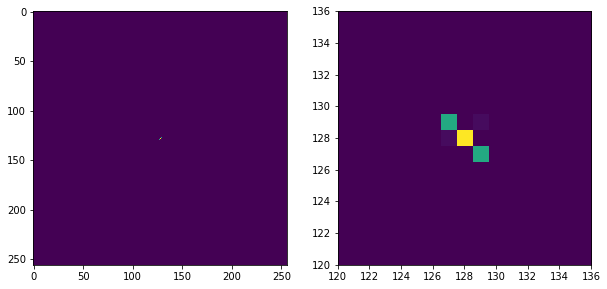

In [111]:
grid = grid_candidates(cands, 'count')
fig, ax = subplots(1,2)
ax[0].imshow(grid)
ax[1].imshow(grid)
ax[1].set_xlim(128-8,128+8)
ax[1].set_ylim(128-8,128+8)
fig.set_size_inches([10,5])

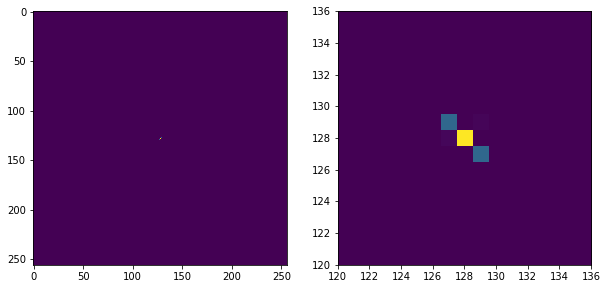

In [112]:
grid = grid_candidates(cands, 'snr')
fig, ax = subplots(1,2)
ax[0].imshow(grid)
ax[1].imshow(grid)
ax[1].set_xlim(128-8,128+8)
ax[1].set_ylim(128-8,128+8)
fig.set_size_inches([10,5])

In [113]:
mainbuf = p.copy_mainbuf()

(664, 186, 11, 256, 8, 2)


' max/min/mean/rms/sum/S/N = 3.20e+01/0.00e+00/2.31e-01/4.98e-01/1.10e+04/64.3 peak at (0, 0)'

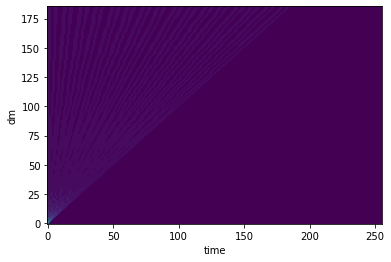

In [115]:
print(mainbuf.shape)
# look at the DM-time plan for UV 0
d = mainbuf[0,:,0,:,0,0]
imshow(d, aspect='auto', origin='lower')
xlabel('time')
ylabel('dm')
printstats(d)

(664, 8, 256)
(5312, 256)


Text(0, 0.5, 'Time')

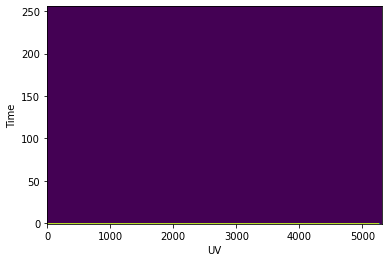

In [116]:
# look at DM=0 for all UVs
d = mainbuf[:,0,0,:,:,0].transpose([0,2,1])
print(d.shape)
d = d.reshape(d.shape[0]*d.shape[1], d.shape[2])
print(d.shape)

imshow(d.T, aspect='auto', origin='lower')
xlabel('UV')
ylabel('Time')

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'baseline_order', 'baseline_shape', 'baselines', 'boxcar_weight', 'ddreader_config', 'ddreader_lut', 'dmax', 'dms', 'dtype', 'fdmt_plan', 'fdmt_scale', 'fft_scale', 'fft_ssr', 'fmax', 'fmin', 'foff', 'freqs', 'get_uv', 'lower_idxs', 'lower_instructions', 'lower_shifts', 'nbl', 'nbox', 'nchunk_time', 'ncin', 'ncu', 'nd', 'ndout', 'nf', 'ngridreg', 'npix', 'nt', 'nuvmax', 'nuvrest', 'nuvrest_max', 'nuvwide', 'save_fdmt_plan_lut', 'save_grid_instructions', 'save_lut', 'save_pad_lut', 'threshold', 'upper_idxs', 'upper_instructions', 'upper_shifts', 'uv_shape', 'uvcells', 'values']


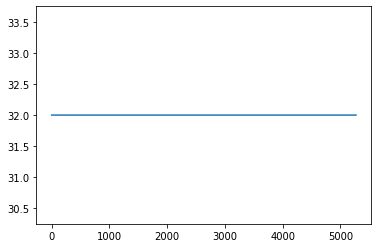

In [122]:
print(dir(plan))
plot(d[:plan.fdmt_plan.nuvtotal, 0])
 # Oh yeah, OK, this makes sense. It's 32 for all baselines because I made every UV = 1. IN practice, it won't be that neat.

# And what if I grid everything properly - i.e. start with baslines,the convert to UV then run the pipeline

In [132]:
print(plan.baseline_shape) # nbl, nc, nt
values.input_scale = 1./16. # need this otherwise somewhere candidates overflow.

(190, 256, 256)


In [133]:
din = np.zeros(plan.baseline_shape, dtype=np.complex64)
din[:, :, 0] = 1 # making this 32 overflows the FDMT


In [139]:
import craft.craco
fast_baseline2uv = craft.craco.FastBaseline2Uv(plan, conjugate_lower_uvs=True)
uv_shape     = (plan.nuvrest, plan.nt, plan.ncin, plan.nuvwide)
uv_out  = np.zeros(uv_shape, dtype=np.complex64)
fast_baseline2uv(din, uv_out)
p.clear_buffers(values)

INFO:root:Clearing mainbuf data NBLK=11


In [140]:
print(uv_out.shape)

(659, 256, 32, 8)


In [141]:
p.inbuf.nparr[:,:,:,:,0] = np.round(uv_out[:,:,:,:].real*(values.input_scale*float(1<<NBINARY_POINT_FDMTIN)))
p.inbuf.nparr[:,:,:,:,1] = np.round(uv_out[:,:,:,:].imag*(values.input_scale*float(1<<NBINARY_POINT_FDMTIN)))
print(p.inbuf.nparr.mean())

0.001126232928679818


In [142]:
p.inbuf.copy_to_device()

In [143]:

p.run(0, values).wait()

INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete
INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts


In [144]:
mainbuf = p.copy_mainbuf()

(664, 186, 11, 256, 8, 2)


' max/min/mean/rms/sum/S/N = 6.40e+01/0.00e+00/4.62e-01/9.96e-01/2.20e+04/64.3 peak at (0, 0)'

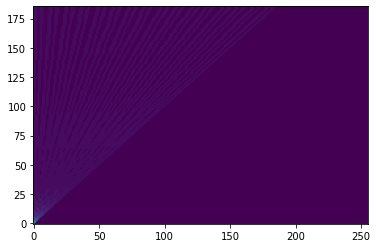

In [145]:
print(mainbuf.shape)
# look at the DM-time plan for UV 0
d = mainbuf[0,:,0,:,0,0]
imshow(d, aspect='auto', origin='lower')
printstats(d)

(664, 8, 256)
(5312, 256)


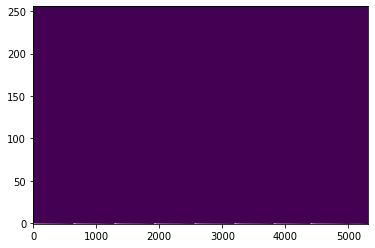

In [146]:
# look at DM=0 for all UVs
d = mainbuf[:,0,0,:,:,0].transpose([0,2,1])
print(d.shape)
d = d.reshape(d.shape[0]*d.shape[1], d.shape[2])
print(d.shape)

imshow(d.T, aspect='auto', origin='lower')

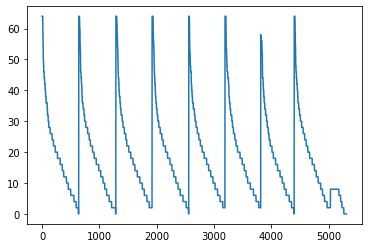

In [147]:
plot(d[:, 0])
# OK so this crazy shape is because of how we're inefficiently packing channels into UV points

In [148]:
cands = p.get_candidates()
print(len(cands))

42


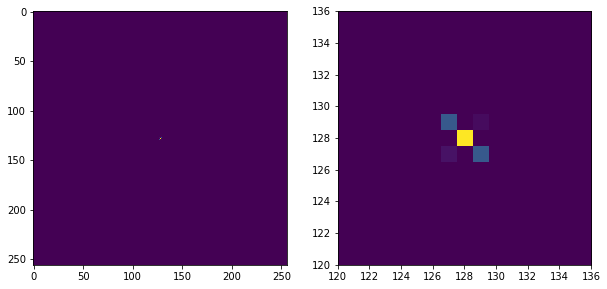

In [149]:
grid = grid_candidates(cands, 'snr')
fig, ax = subplots(1,2)
ax[0].imshow(grid)
ax[1].imshow(grid)
ax[1].set_xlim(128-8,128+8)
ax[1].set_ylim(128-8,128+8)
fig.set_size_inches([10,5])

In [150]:
print_candidates(cands, 256, 0)

# SNR	upix	vpix	boxc_width	time	dm	iblk

47.4	128	128	0		0	0	0
13.0	129	129	1		1	0	0
23.3	127	129	0		0	0	0
23.3	129	127	0		0	0	0
12.5	127	127	0		0	0	0
33.3	128	128	1		1	1	0
16.4	127	129	1		1	1	0
16.4	129	127	1		1	1	0
10.1	127	127	0		0	1	0
25.9	128	128	4		4	2	0
12.9	127	129	1		1	2	0
12.9	129	127	1		1	2	0
16.3	128	128	7		8	2	0
30.8	128	128	3		4	3	0
14.7	127	129	3		4	3	0
14.7	129	127	3		4	3	0
23.5	128	128	7		8	3	0
11.0	127	129	7		8	3	0
11.0	129	127	7		8	3	0
28.8	128	128	4		5	4	0
13.8	127	129	4		5	4	0
13.8	129	127	4		5	4	0
22.6	128	128	7		8	4	0
10.8	127	129	7		8	4	0
10.8	129	127	7		8	4	0
23.5	128	128	5		6	5	0
11.5	127	129	5		6	5	0
11.5	129	127	5		6	5	0
19.9	128	128	7		8	5	0
20.8	128	128	5		6	6	0
10.2	127	129	5		6	6	0
10.2	129	127	5		6	6	0
18.3	128	128	7		8	6	0
19.1	128	128	6		7	7	0
17.5	128	128	7		8	7	0
14.6	128	128	6		7	8	0
15.4	128	128	7		8	8	0
14.5	128	128	6		7	9	0
16.6	128	128	5		8	9	0
13.2	128	128	3		7	10	0
14.3	128	128	5		8	10	0
11.4	128	128	5		9	11	0


# How about pulse with Nonzero DM?

In [151]:
from craft import simfrb

In [214]:
dm = 100
toff = 10
tsamp = 1.7
frb = simfrb.mkfrb_fdmt(plan.fmin/1e9, plan.foff/1e9, plan.nf, tsamp, dm, toffset=toff, ntimes=plan.nt)

(50.0, 100.0)

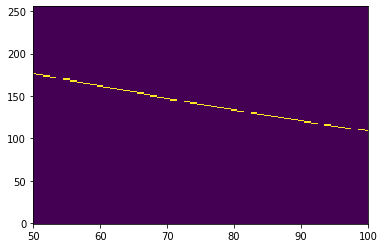

In [215]:
imshow(frb.T, aspect='auto', origin='lower', interpolation='none')
xlim(50,100)

In [216]:
din[:] = 0
print(din.shape, frb.shape)
din[:] = frb.T
fast_baseline2uv(din, uv_out)
assert din.sum() == uv_out.sum(), 'baseline2uv didnt conserve energy'

(190, 256, 256) (256, 256)


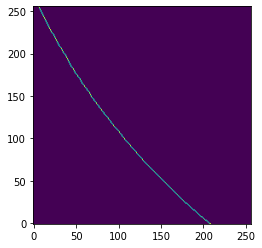

In [217]:
imshow(din[0,:,:].real, origin='lower')

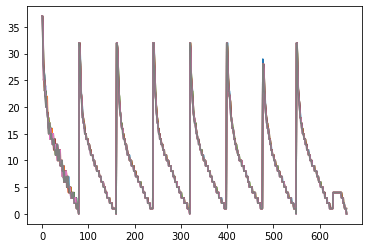

In [218]:
plot(uv_out.sum(axis=1).sum(axis=1).real)

(659, 256, 32, 8) (49590+0j) (49590+0j)


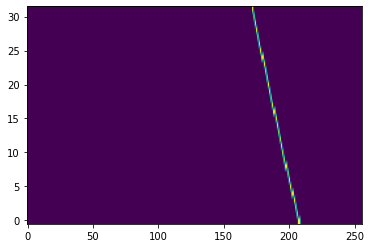

In [219]:
print(uv_out.shape, uv_out.sum(), din.sum())
imshow(uv_out[1,:,:,0].real.T, aspect='auto', origin='lower')

In [220]:
# This one seems to hang when together with the 3 cells below. Let's space it out.
p.clear_buffers(values)


INFO:root:Clearing mainbuf data NBLK=11


In [221]:

p.inbuf.nparr[:,:,:,:,0] = np.round(uv_out[:,:,:,:].real*(values.input_scale*float(1<<NBINARY_POINT_FDMTIN)))
p.inbuf.nparr[:,:,:,:,1] = np.round(uv_out[:,:,:,:].imag*(values.input_scale*float(1<<NBINARY_POINT_FDMTIN)))
p.inbuf.copy_to_device()
values.run_fdmt = True
values.run_image = True
values.threshold = 10


In [222]:
p.run(0, values).wait()

INFO:craco.search_pipeline:
Configuration just before pipeline running 
ndm=512 nchunk_time=32 tblk=0 nuv=5272 nparallel_uv=2636 nurest=659 load_luts=1 nplane=16384 threshold=640 shift1=0 shift2=7 fft_cfg=400001c0

INFO:root:Running fdmt
INFO:root:fdmt complete
INFO:root:Candidates cleared
INFO:root:10 kernels running
INFO:craco.search_pipeline:Waiting for 10 starts


In [223]:
cands = p.get_candidates()
print_candidates(cands, 256, 0)

# SNR	upix	vpix	boxc_width	time	dm	iblk

10.0	128	128	7		200	186	0
10.0	128	128	7		201	187	0
10.7	128	128	3		198	188	0
10.8	128	128	6		201	188	0
10.8	128	128	3		199	189	0
11.7	128	128	7		203	189	0
10.9	128	128	1		198	190	0
12.7	128	128	6		203	190	0
11.0	128	128	1		199	191	0
12.8	128	128	6		204	191	0
10.3	128	128	7		208	191	0
14.2	128	128	7		206	192	0
11.3	128	128	6		208	192	0
14.6	128	128	7		207	193	0
13.6	128	128	7		208	193	0
16.4	128	128	7		207	194	0
15.2	128	128	7		208	194	0
17.9	128	128	6		207	195	0
17.0	128	128	7		208	195	0
17.4	128	128	5		207	196	0
18.5	128	128	6		208	196	0
16.3	128	128	4		207	197	0
20.1	128	128	5		208	197	0
18.4	128	128	3		207	198	0
21.6	128	128	4		208	198	0
10.7	127	129	4		208	198	0
10.7	129	127	4		208	198	0
21.5	128	128	1		207	199	0
10.4	127	129	1		207	199	0
10.4	129	127	1		207	199	0
24.5	128	128	3		208	199	0
12.3	127	129	2		208	199	0
12.3	129	127	2		208	199	0
19.3	128	128	1		207	200	0
24.4	128	128	3		209	200	0
12.2	127	129	3		209	200	0
12.2	129	127	3		209	200

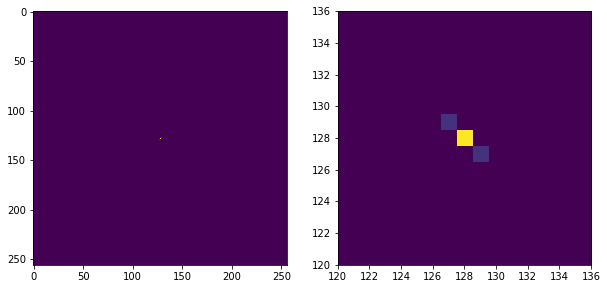

In [224]:
grid = grid_candidates(cands, 'snr')
fig, ax = subplots(1,2)
ax[0].imshow(grid)
ax[1].imshow(grid)
ax[1].set_xlim(128-8,128+8)
ax[1].set_ylim(128-8,128+8)
fig.set_size_inches([10,5])

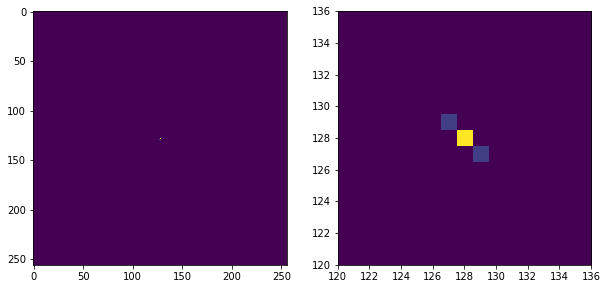

In [225]:
grid = grid_candidates(cands, 'count')
fig, ax = subplots(1,2)
ax[0].imshow(grid)
ax[1].imshow(grid)
ax[1].set_xlim(128-8,128+8)
ax[1].set_ylim(128-8,128+8)
fig.set_size_inches([10,5])

In [226]:
mainbuf = p.copy_mainbuf()

(664, 186, 11, 256, 8, 2)


' max/min/mean/rms/sum/S/N = 4.80e+01/0.00e+00/4.62e-01/1.10e+00/2.20e+04/43.6 peak at (10, 66)'

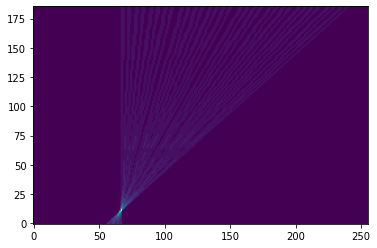

In [213]:
print(mainbuf.shape)
d = mainbuf[0,:,0,:,0,0]
imshow(d, aspect='auto', origin='lower')
printstats(d)